# Import Libraries

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [2]:
datasets=datasets.load_iris()

In [3]:
datasets.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
data=pd.DataFrame(datasets.data, columns=datasets.feature_names)

In [7]:
target_class=list(datasets.target)
iris_target_names={i : datasets.target_names[i] for i in range (0,len(datasets.target_names))}

In [8]:
target=list(map(iris_target_names.get , target_class))

In [9]:
print(data.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [10]:
data.shape


(150, 4)

As we can see, the iris dataset has 4 features and 150 data points

We know that PCA works perfectly on the data if the variables are highly correlated, so before applying PCA let’s have a look at the correlation matrix for the dataset

In [11]:
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


As we can see, except for petal length and sepal width, our feature variables are highly correlated, so we can say that PCA will work excellently on the data.

# Scaling

our first step is to standardize the data i.e. mean = 0, for this we will use standardscaler module from the scikit-learn library.

In [12]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(datasets.data)

# PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca=PCA()

In [17]:
principal_components=pca.fit_transform(x)
principal_components=pd.DataFrame(principal_components)

In [18]:
principal_components.head(10)

,0,1,2,3
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
5,-2.075631,1.489178,0.026968,-0.006608
6,-2.444029,0.047644,0.335470,0.036776
7,-2.232847,0.223148,-0.088695,0.024612
8,-2.334640,-1.115328,0.145077,0.026859
9,-2.184328,-0.469014,-0.253766,0.039899


We get 4 principal components after PCA transformation, since the number of principal components is equal to the number of features.

In [22]:
print(list(np.round(pca.explained_variance_ratio_,decimals=5)))

[0.72962, 0.22851, 0.03669, 0.00518]


In [32]:
(pca.explained_variance_ratio_)*100

array([72.96244541, 22.85076179,  3.66892189,  0.51787091])

As we can see, the percentage of variance explained by the first principal component is the highest i.e. 73%, followed by the second principal component i.e. 23%, and the last principal component explains the lowest variance i.e. 3%

we can see that just by using the first two principal components, we can easily retain 95% of the total variance, so we can safely drop the last two components as they just explain 5% of the total variance

finally, we converted our 4D data into 2D using PCA

In [36]:
pca_df=pd.DataFrame(abs(pca.components_[:2]), columns=datasets.feature_names, index=["Component 1 " , "Component 2"])

In [37]:
pca_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Component 1,0.521066,0.269347,0.580413,0.564857
Component 2,0.377418,0.923296,0.024492,0.066942


<Axes: title={'center': 'Feature importance for PCA_1'}>

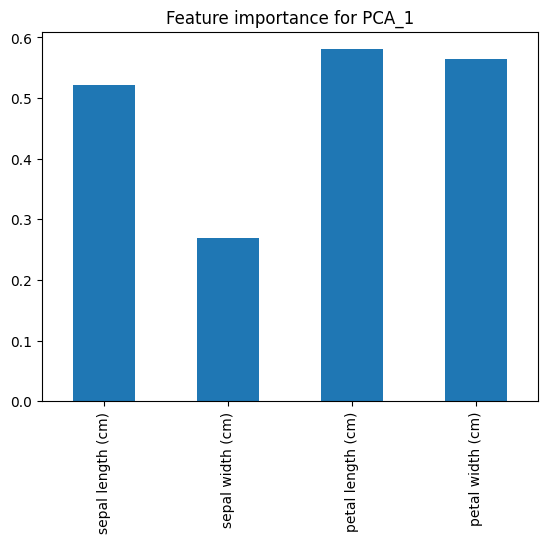

In [51]:
pca_df.iloc[0,:].plot(kind="bar",title="Feature importance for PCA_1")

<Axes: title={'center': 'Feature importance for PCA_2'}>

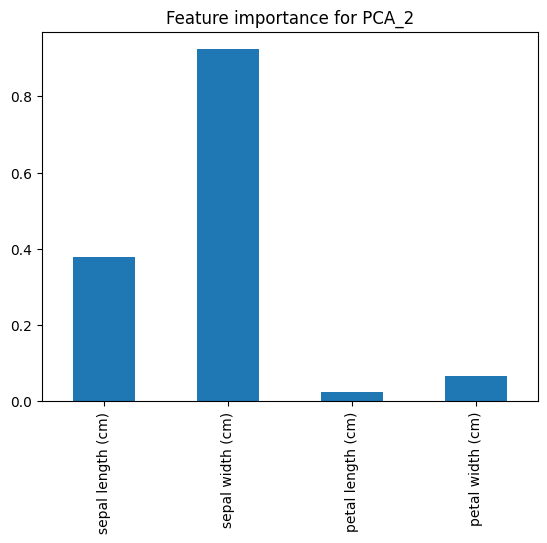

In [53]:
pca_df.iloc[1,:].plot(kind="bar",title="Feature importance for PCA_2")